## Downloading and Importing necessary libraries


In [ ]:
install.packages("visdat")
install.packages("funModeling")
install.packages("factoextra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘funModeling’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘res

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’




In [ ]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization
library(GGally)
library(funModeling)
library(Hmisc)

ERROR: ignored

## Data Reading

In [ ]:
df <- read.csv("../content/Mall_Customers.csv")
df

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
<int>,<chr>,<int>,<int>,<int>
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [ ]:
glimpse(df)

Rows: 200
Columns: 5
$ CustomerID             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Gender                 <chr> "Male", "Male", "Female", "Female", "Female", "…
$ Age                    <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35,…
$ Annual.Income..k..     <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19,…
$ Spending.Score..1.100. <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15…


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


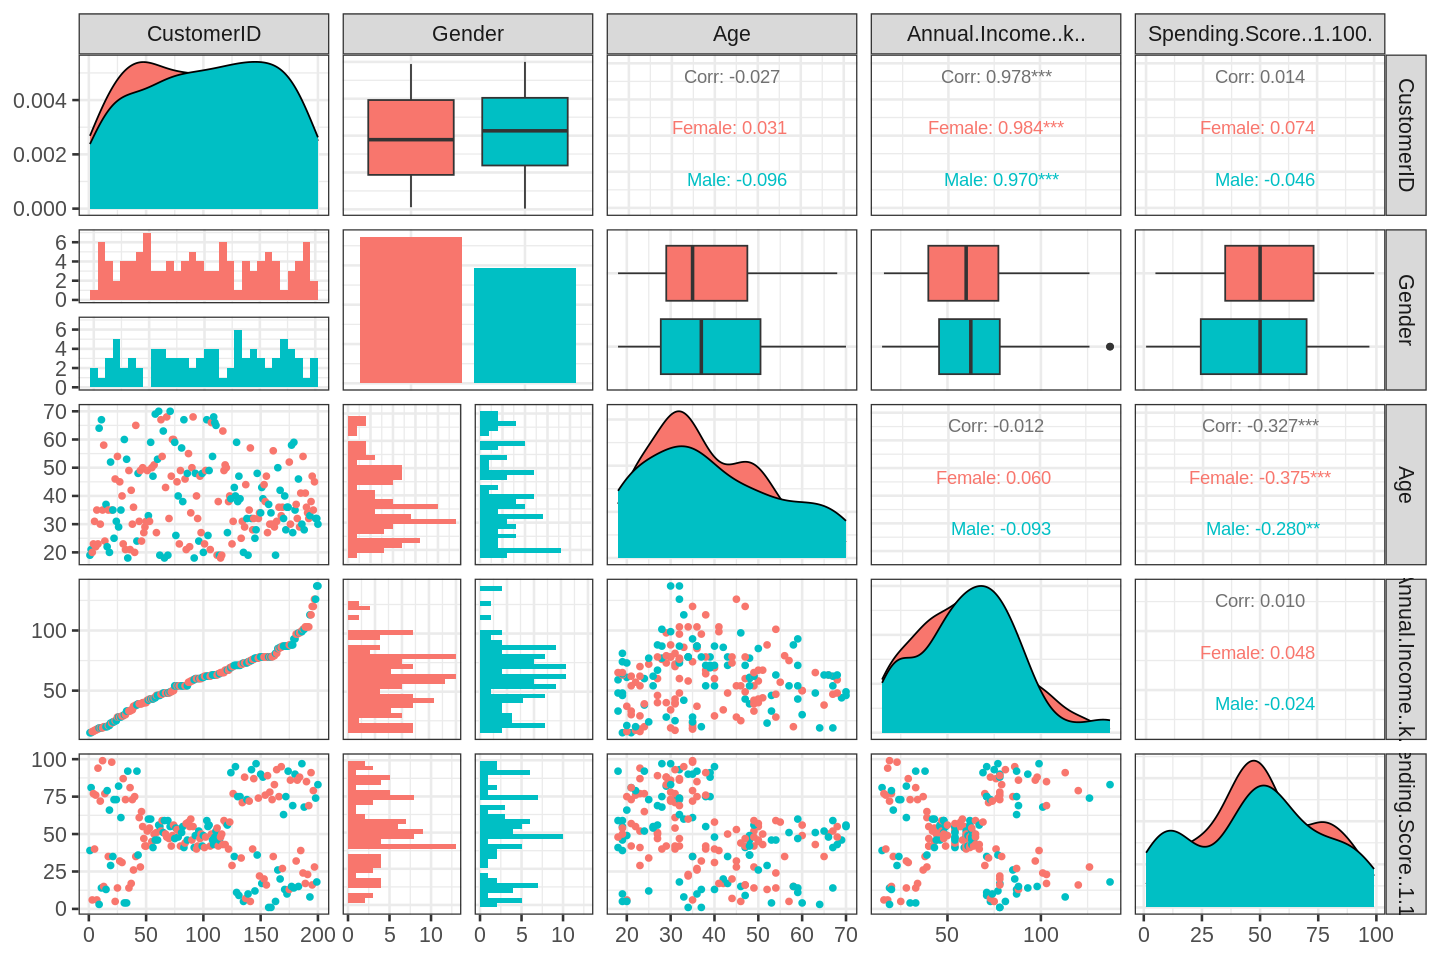

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
ggpairs(df,aes(color=Gender))+theme_bw(base_size = 16)

## Data Preprocessing


In [ ]:
#umber of rows (customers) and columns (attributes) in your dataset

dim(df)

[1] 200   5

In [ ]:
## To remove missing values that may exist inside the dataset
## To drop unecessary column
## Removes rows with missing data, ensuring the dataset contains complete information for analysis.
## Removes the first and second columns from the dataset, potentially excluding certain attributes or identifiers.

# df <- na.omit(df)
# df<-df[-c(1,2)]
# df


#Normalization
df$Gender<-as.numeric(as.character(factor(df$Gender, c("Male", "Female"), labels=c(1,0))))
dfs<-scale(df)

## Data Visualization

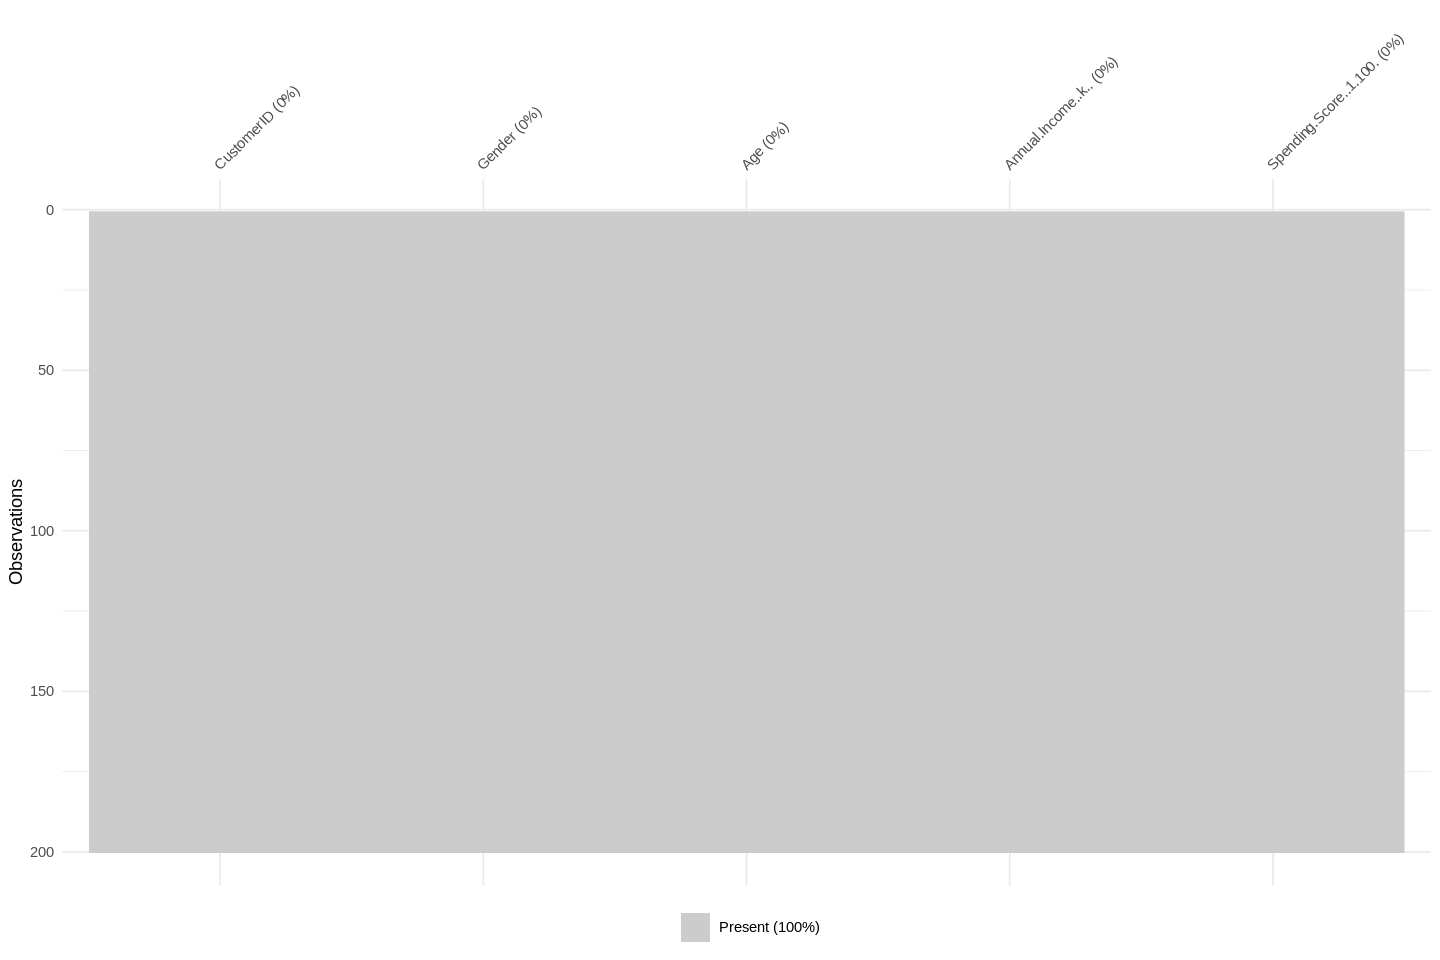

In [ ]:
# visualize missing values in the df

library(visdat)
visdat::vis_miss(data.frame(df))


# Results =  no missing values

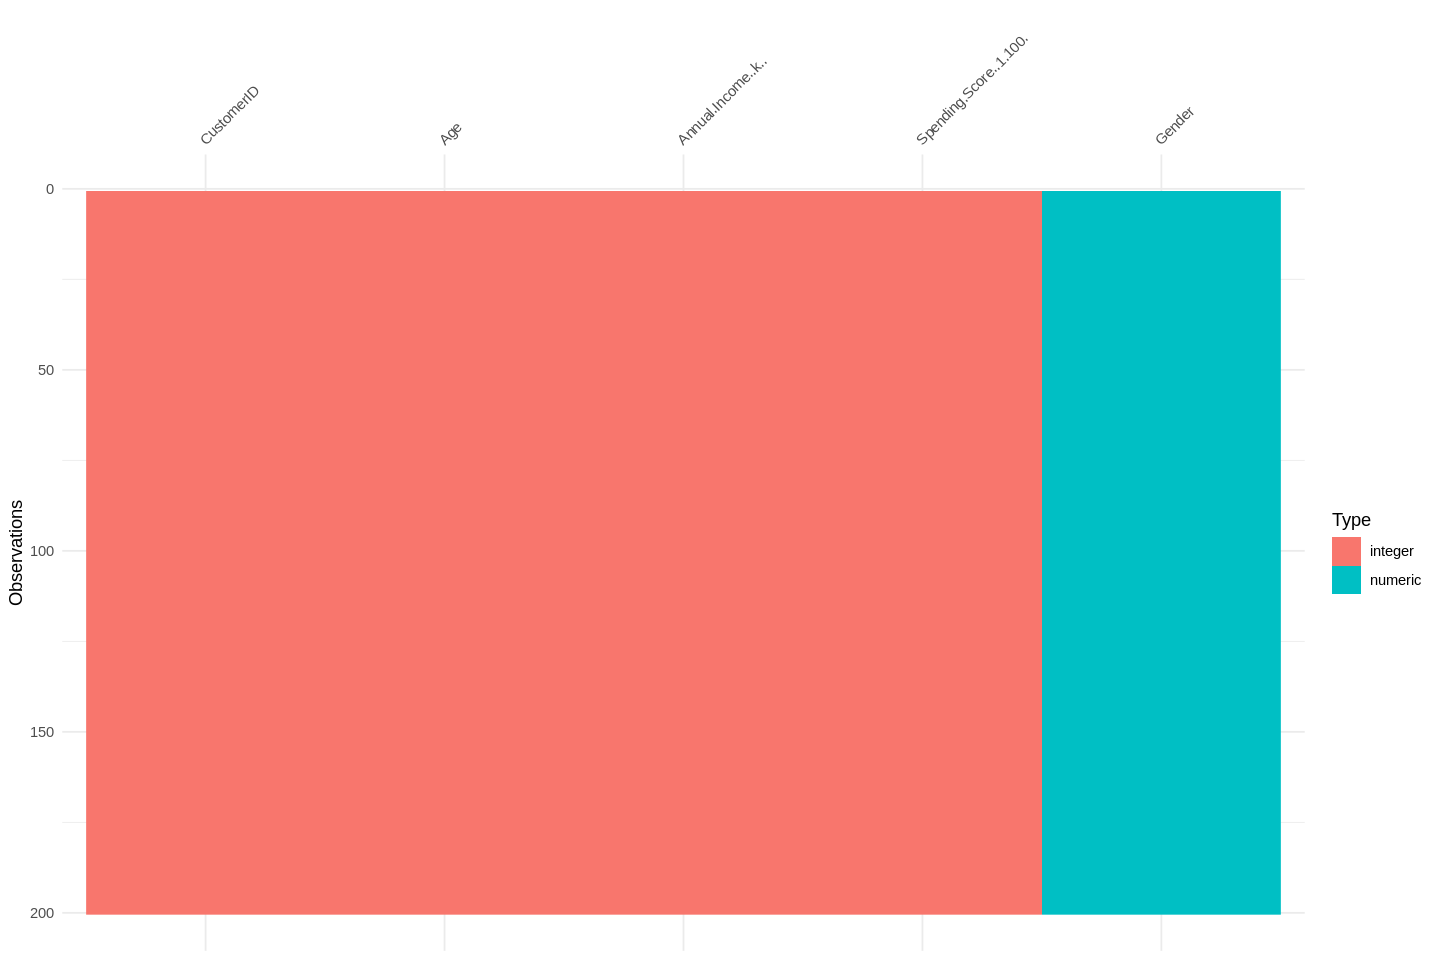

In [ ]:
# generate a visual representation of df

library(visdat)
visdat::vis_dat(data.frame(df))

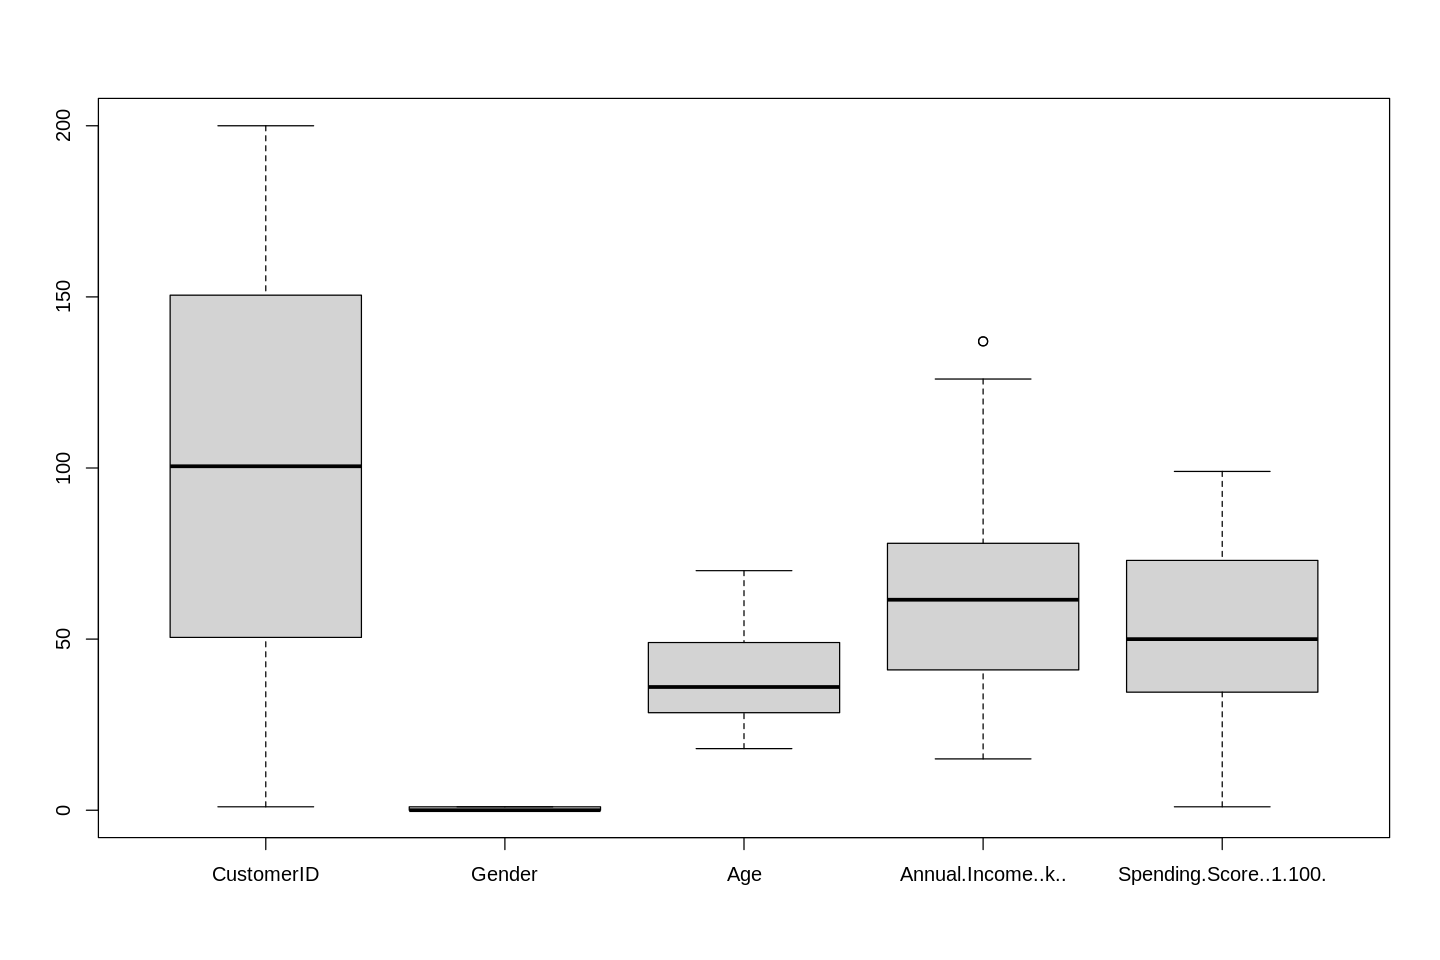

In [ ]:
#Box Plot

boxplot(df)

In [ ]:
# # Generate a scatterplot for numerical variables in a dataframe

# library(ggplot2)

# plot_num <- function(data) {
#   # Assuming numerical columns are columns 1 to 3, adjust this as per your data
#   ggplot(data, aes(x = data[,1], y = data[,2])) +
#     geom_point() +
#     labs(x = names(data)[1], y = names(data)[2]) +
#     ggtitle("Scatterplot of Numerical Variables")
# }
# plot_num(df)

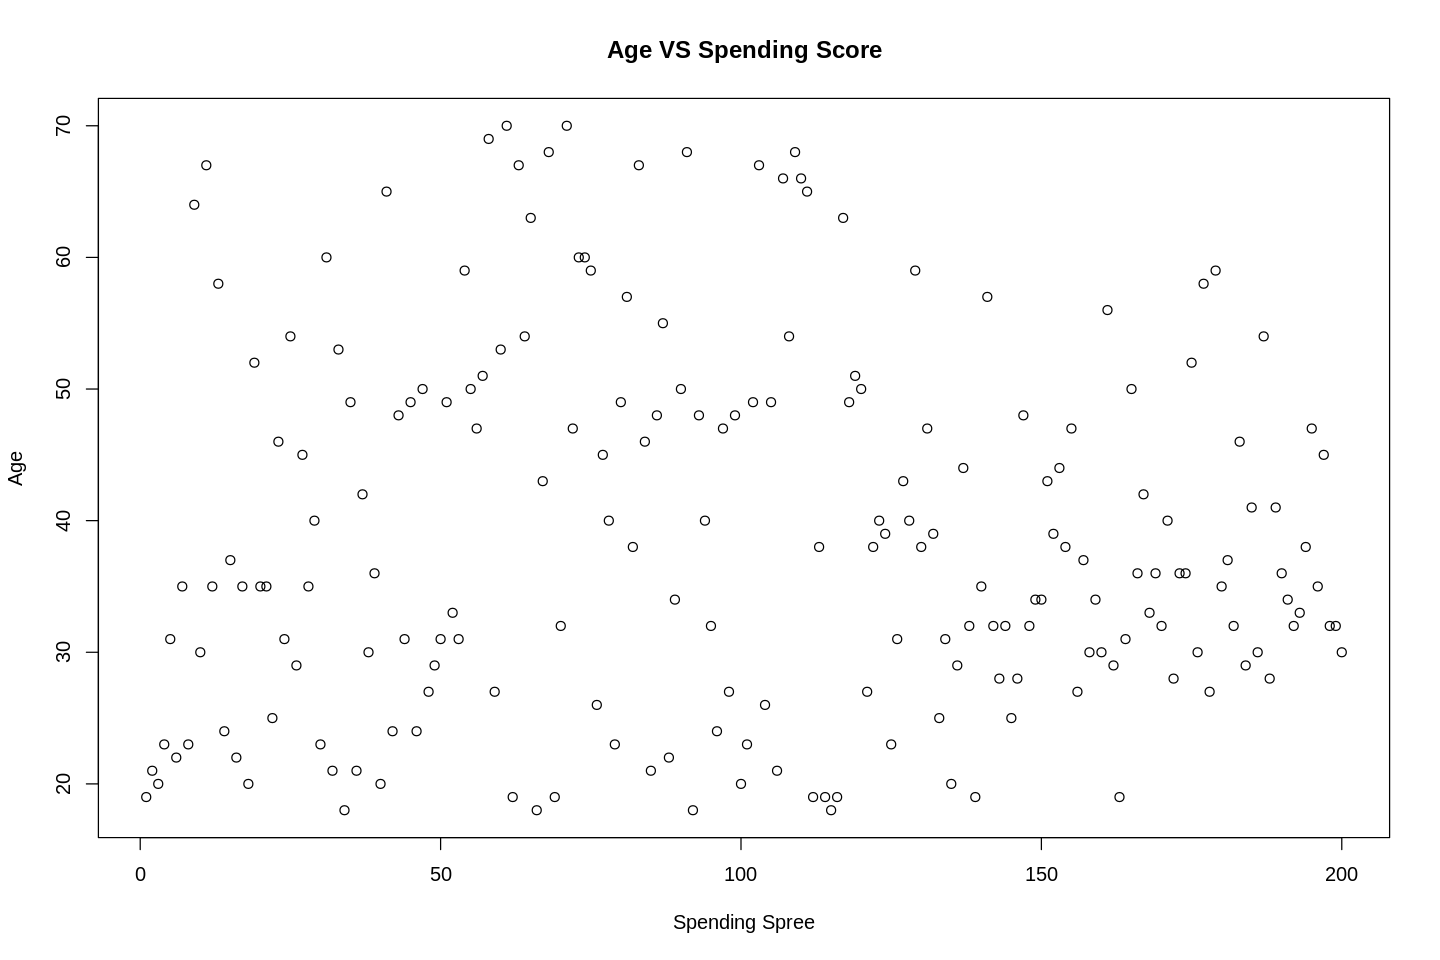

In [ ]:
#Scatter Plot

plot(df$Age,df$Score,col="black",xlab="Spending Spree",ylab = "Age", main="Age VS Spending Score")

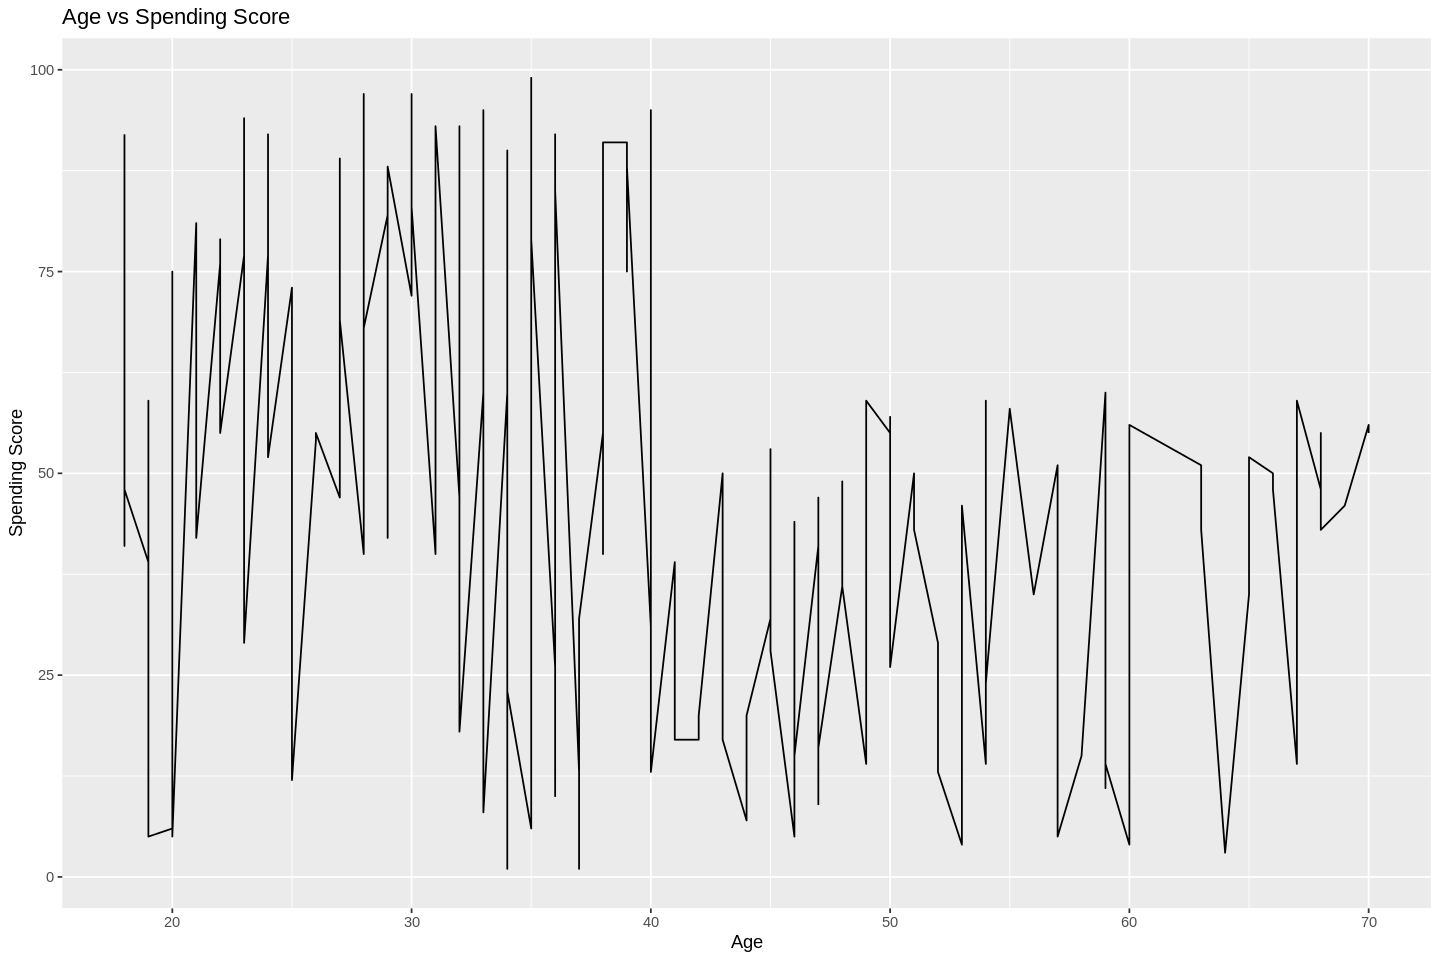

In [ ]:
#Line Plot

ggplot(df, aes(x = Age, y = `Spending.Score..1.100.`)) +
  geom_line() +
  labs(x = "Age", y = "Spending Score") +
  ggtitle("Age vs Spending Score")


## Distance Matrix

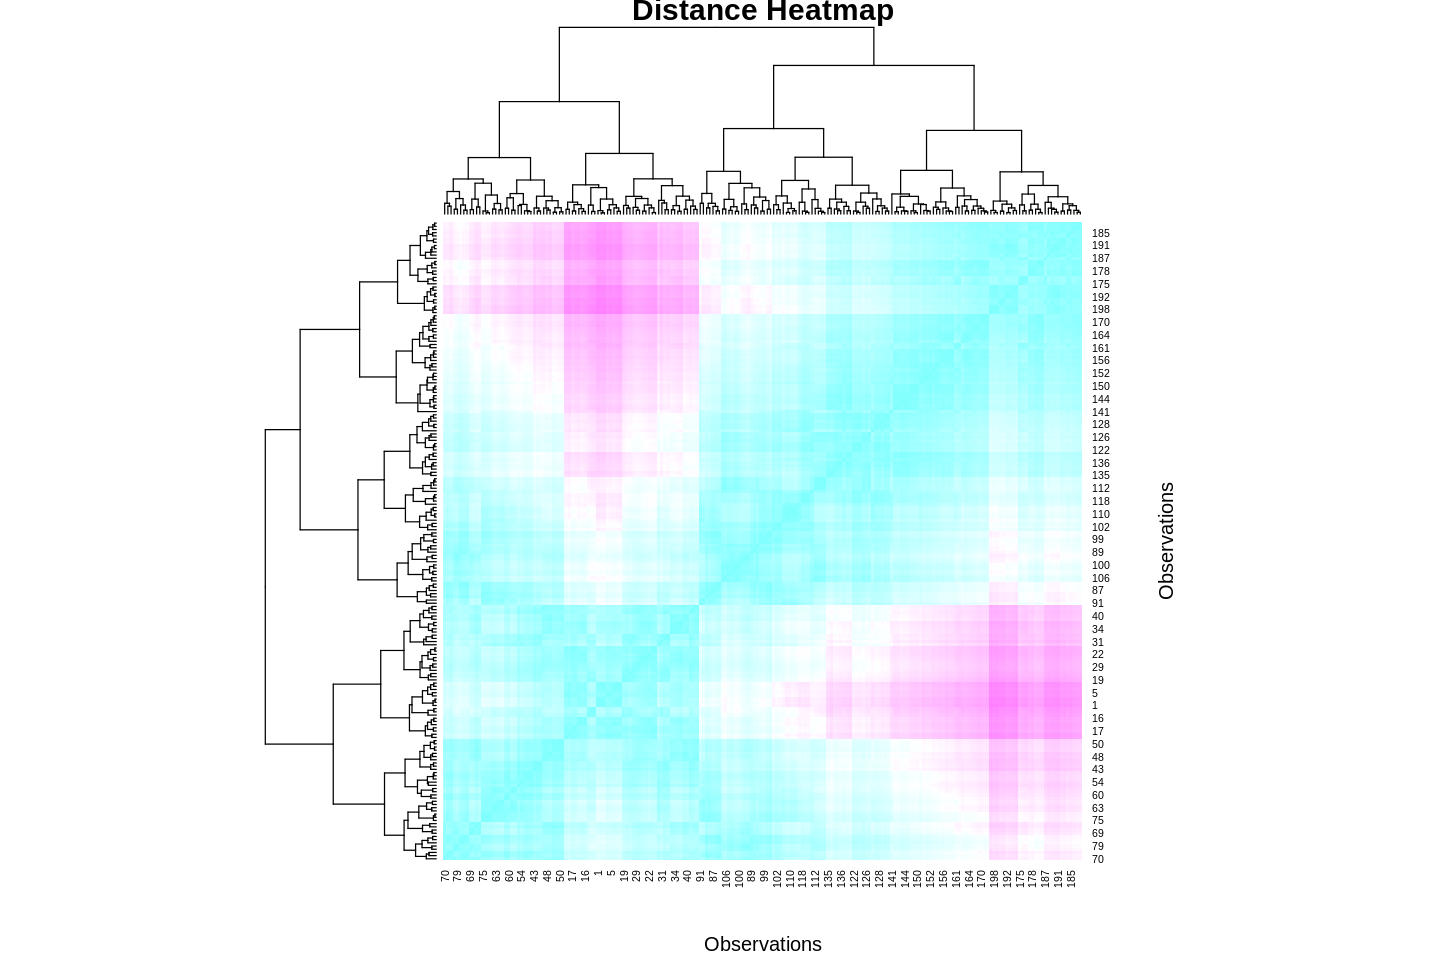

In [ ]:
# Calculate distance matrix using column indices
distance_matrix <- dist(df[, c(1, 3)])

# Convert distance matrix to a square matrix
distance_matrix <- as.matrix(distance_matrix)

# Create a heatmap for the distance matrix
heatmap(distance_matrix, col = cm.colors(256), scale = "none",
        main = "Distance Heatmap", xlab = "Observations", ylab = "Observations")


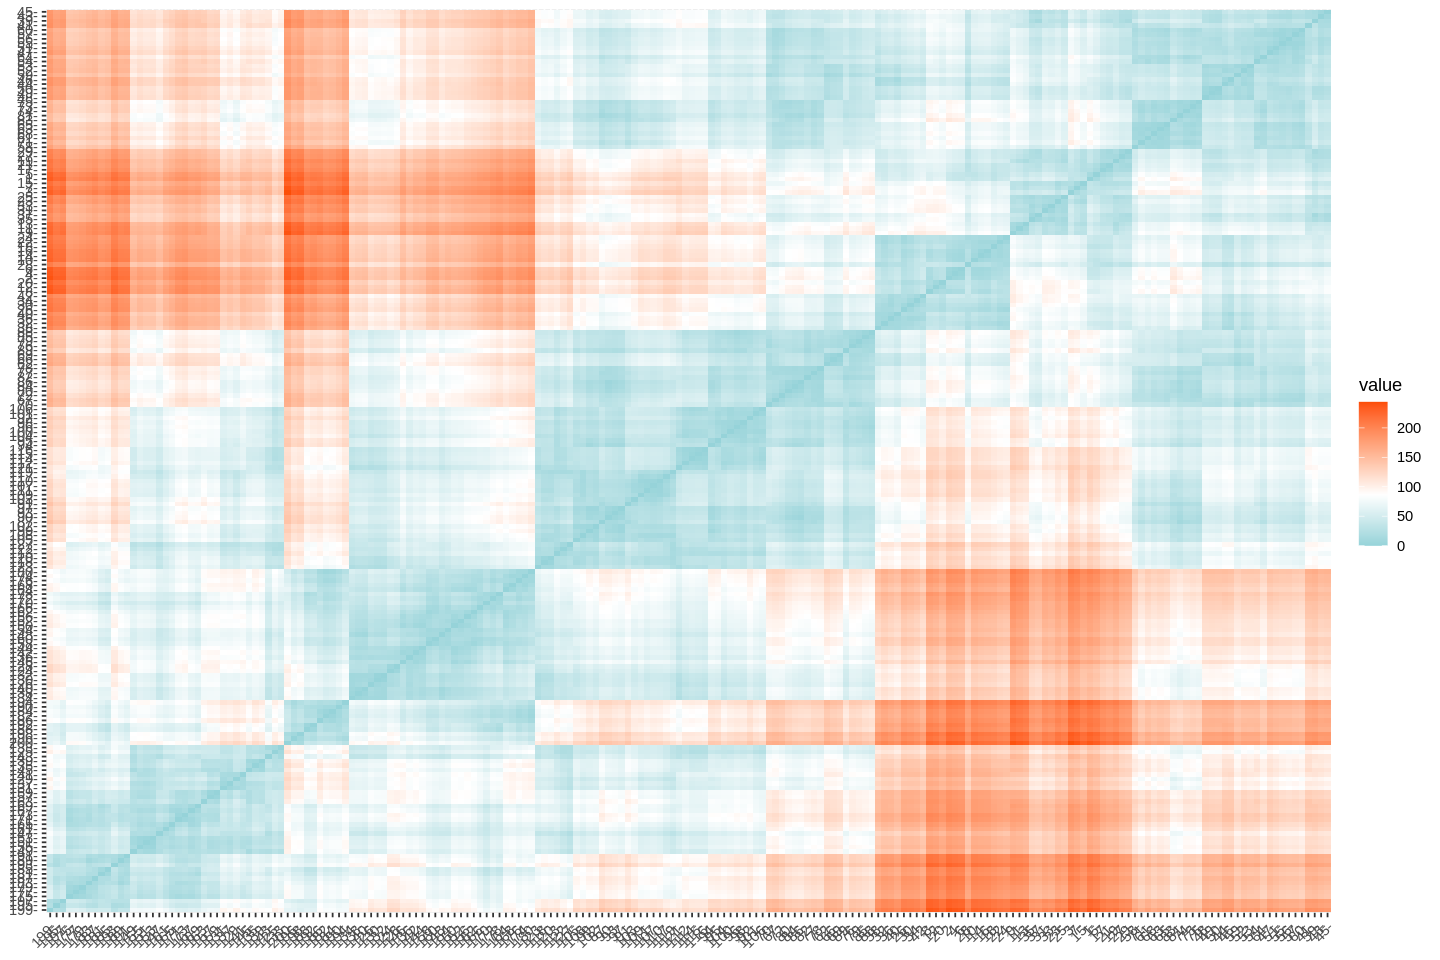

In [ ]:
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

## Perform Clustering for k=n

In [ ]:
# df <- scale(df)
# head(df)

set.seed(1)
km<-kmeans(dfs, centers=5, nstart=5, iter.max=500)
km

K-means clustering with 5 clusters of sizes 41, 37, 29, 40, 53

Cluster means:
  CustomerID      Gender         Age Annual.Income..k.. Spending.Score..1.100.
1 -0.4987260 -0.88418647  0.75978302         -0.4484918             -0.3307629
2  1.0779677  0.14772649  0.07458596          1.0231379             -1.2144804
3 -0.5221936  1.12532823  1.27955677         -0.4755822             -0.4056713
4  1.0448489  0.07033301 -0.45099840          0.9705034              1.2111051
5 -0.8695732 -0.08796366 -0.99958481         -0.8395507              0.4116475

Clustering vector:
  [1] 5 5 5 5 5 5 1 5 3 5 3 5 1 5 3 5 5 5 3 5 5 5 1 5 1 5 1 5 1 5 3 5 3 5 1 5 1
 [38] 5 1 5 1 5 3 5 1 5 1 5 5 5 1 5 5 3 1 3 1 3 5 3 3 5 1 1 3 5 1 1 5 5 3 1 1 1
 [75] 3 5 1 3 5 1 3 3 3 1 5 3 1 5 1 1 1 5 3 1 1 5 1 5 3 5 5 1 3 5 3 5 1 3 3 3 3
[112] 5 1 5 5 5 1 1 1 1 4 1 1 4 2 4 2 4 3 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
[149] 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
[186] 4 2 4 2 4 2 4 2 4 2 4

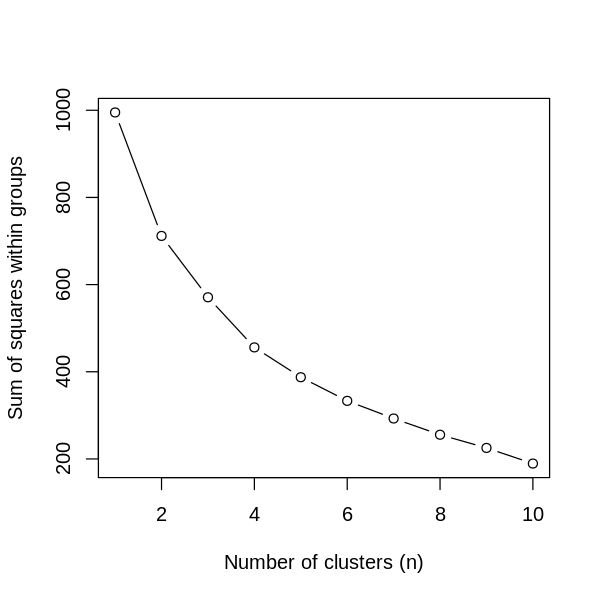

In [ ]:
wss<-0
for (n in 1:10){
    km<-kmeans(dfs, centers=n, nstart=10, iter.max=50) #starts with random centroids 10 times
    wss[n]<-km$tot.withinss
}
options(repr.plot.width=5, repr.plot.height=5)
plot(wss, type="b", xlab="Number of clusters (n)", ylab="Sum of squares within groups")

In [ ]:
df$kmeans = km$cluster
df%>%
group_by(kmeans)%>%
summarise(Age_mean= mean(Age),
          AnIncome_mean= mean(Annual.Income..k..),
          SpenScore_mean= mean(Spending.Score..1.100.),
          Gender=(mean(Gender)),
          Count=(length(kmeans)))

kmeans,Age_mean,AnIncome_mean,SpenScore_mean,Gender,Count
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,32.94737,86.05263,81.26316,1.00000000,19
2,44.60000,92.33333,21.60000,0.00000000,15
3,32.19048,86.04762,81.66667,0.00000000,21
4,27.83333,58.12500,46.54167,0.00000000,24
5,25.85714,26.64286,79.14286,0.00000000,14
6,58.11538,48.03846,41.26923,1.00000000,26
7,39.50000,85.15000,14.05000,1.00000000,20
8,24.50000,39.50000,61.72727,1.00000000,22
9,41.21429,26.07143,20.14286,0.07142857,14


In [ ]:
k2 <- kmeans(df,centers=2,nstart=25)
str(k2)

List of 9
 $ cluster     : int [1:200] 2 2 2 2 2 2 2 2 2 2 ...
 $ centers     : num [1:2, 1:6] 150 50 0.475 0.404 37.772 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:6] "CustomerID" "Gender" "Age" "Annual.Income..k.." ...
 $ totss       : num 977133
 $ withinss    : num [1:2] 217168 171053
 $ tot.withinss: num 388220
 $ betweenss   : num 588912
 $ size        : int [1:2] 101 99
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [ ]:
k2

K-means clustering with 2 clusters of sizes 101, 99

Cluster means:
  CustomerID    Gender      Age Annual.Income..k.. Spending.Score..1.100.
1        150 0.4752475 37.77228           81.35644               50.45545
2         50 0.4040404 39.94949           39.34343               49.93939
    kmeans
1 4.118812
2 7.171717

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 217167.7 171052.6
 (between_SS / total_SS =  60.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"   

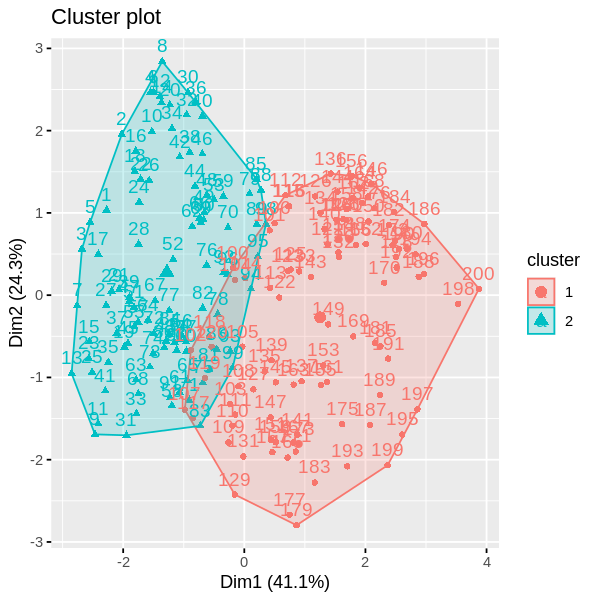

In [ ]:
fviz_cluster(k2, data = df)

In [ ]:
k4 <- kmeans(df,centers=4,nstart=25)
str(k4)

List of 9
 $ cluster     : int [1:200] 4 4 4 4 4 4 4 4 4 4 ...
 $ centers     : num [1:4, 1:6] 93.015 162 164 30.533 0.431 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:6] "CustomerID" "Gender" "Age" "Annual.Income..k.." ...
 $ totss       : num 977133
 $ withinss    : num [1:4] 47899 33781 33468 81113
 $ tot.withinss: num 196261
 $ betweenss   : num 780871
 $ size        : int [1:4] 65 39 36 60
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [ ]:
k4

K-means clustering with 4 clusters of sizes 65, 39, 36, 60

Cluster means:
  CustomerID    Gender      Age Annual.Income..k.. Spending.Score..1.100.
1   93.01538 0.4307692 43.49231           57.93846               49.30769
2  162.00000 0.4615385 32.69231           86.53846               82.12821
3  164.00000 0.5277778 40.80556           87.91667               17.88889
4   30.53333 0.3833333 36.65000           30.10000               49.80000
    kmeans
1 6.923077
2 2.076923
3 4.750000
4 7.066667

Clustering vector:
  [1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
[149] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
[186] 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2

Within cluster sum of squares by cluster:
[

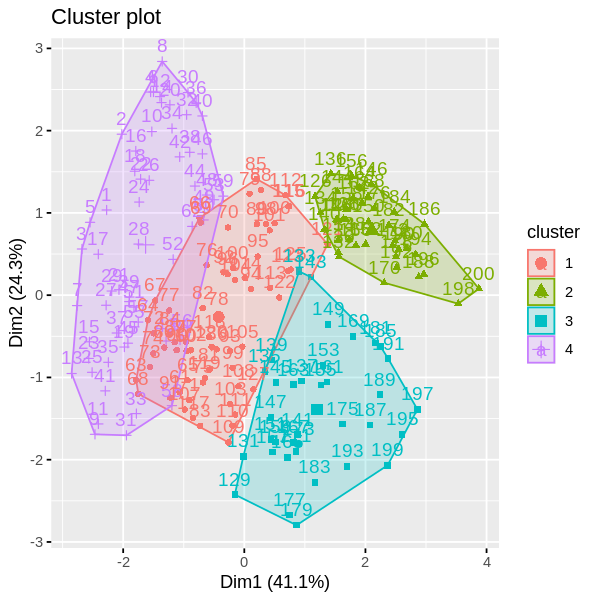

In [ ]:
fviz_cluster(k4,data=df)

In [ ]:
k6 <- kmeans(df,centers=6,nstart=25)
str(k6)

List of 9
 $ cluster     : int [1:200] 2 1 2 1 2 1 2 1 2 1 ...
 $ centers     : num [1:6, 1:6] 24 23 110.7 164.9 68.1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:6] "CustomerID" "Gender" "Age" "Annual.Income..k.." ...
 $ totss       : num 977133
 $ withinss    : num [1:6] 8725 13043 24104 31694 20305 ...
 $ tot.withinss: num 123480
 $ betweenss   : num 853653
 $ size        : int [1:6] 23 23 42 35 43 34
 $ iter        : int 5
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [ ]:
k6

K-means clustering with 6 clusters of sizes 23, 23, 42, 35, 43, 34

Cluster means:
  CustomerID    Gender      Age Annual.Income..k.. Spending.Score..1.100.
1   24.00000 0.3913043 25.52174           26.30435               78.56522
2   23.00000 0.3913043 45.21739           26.30435               20.91304
3  110.66667 0.4285714 38.42857           64.21429               51.19048
4  164.88571 0.5428571 41.25714           88.37143               17.42857
5   68.09302 0.4186047 46.23256           48.60465               50.65116
6  166.82353 0.4411765 32.26471           88.88235               82.76471
    kmeans
1 6.173913
2 8.173913
3 5.595238
4 4.771429
5 7.488372
6 2.117647

Clustering vector:
  [1] 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [38] 1 2 1 2 1 2 1 2 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [75] 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 4 3 4 3 3 3 4 6 4 6 4 

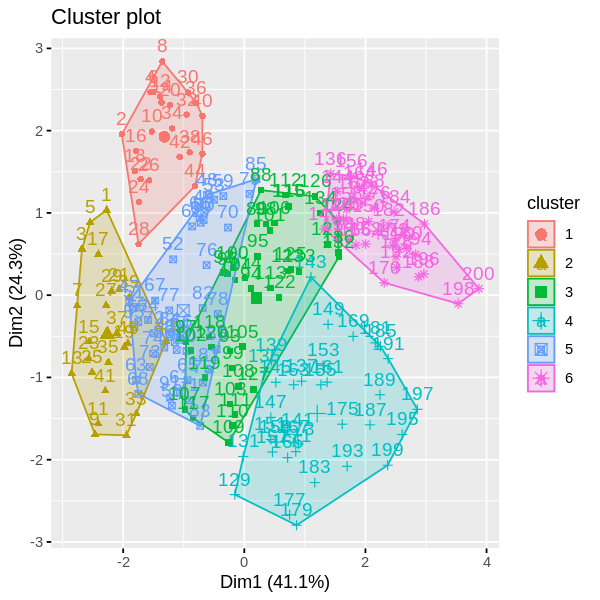

In [ ]:
fviz_cluster(k6,data=df)

  cluster size ave.sil.width
1       1   26          0.29
2       2   55          0.22
3       3   52          0.26
4       4   28          0.33
5       5   39          0.34


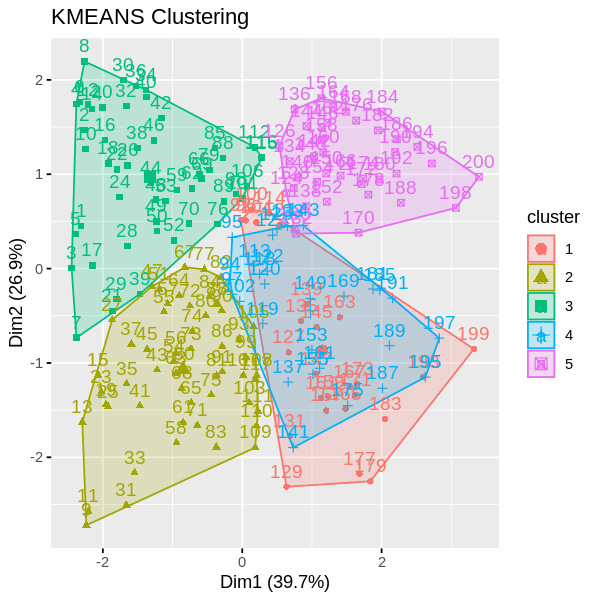

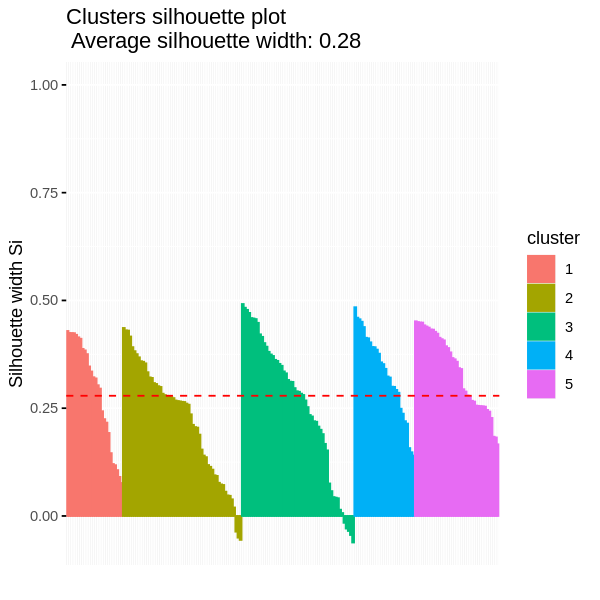

In [ ]:
fviz_silhouette(eclust(dfs, FUNcluster="kmeans", k=5, hc_metric="euclidean"))

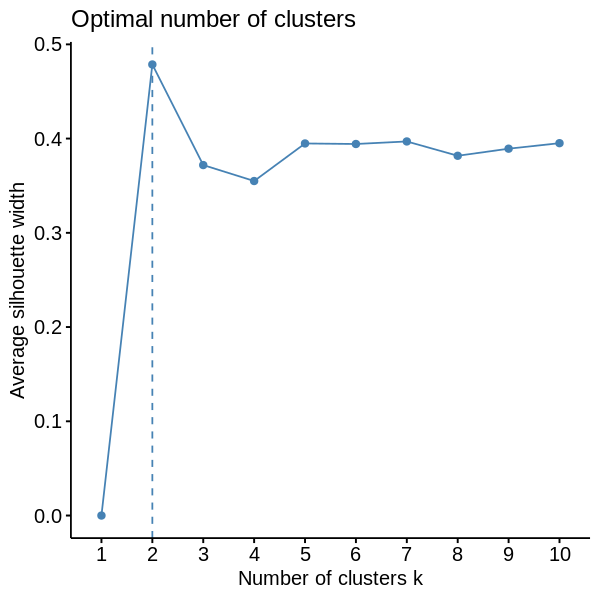

In [ ]:
## Silhoutte Method

set.seed(123)
fviz_nbclust(df, kmeans, method = "silhouette")

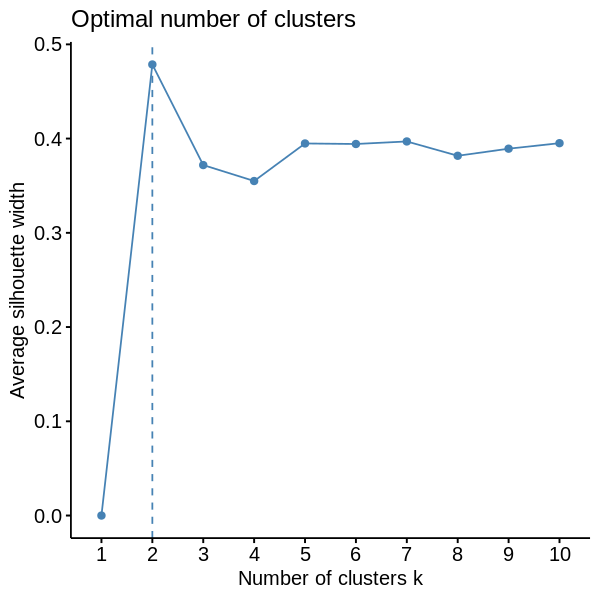

In [ ]:
## Silhoutte Method

set.seed(456)
fviz_nbclust(df, kmeans, method = "silhouette")

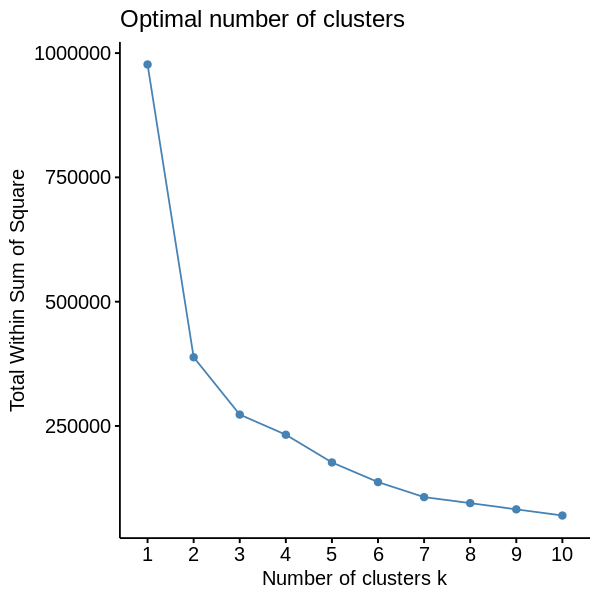

In [ ]:
## Elbow Method

set.seed(123)
fviz_nbclust(df, kmeans, method = "wss")

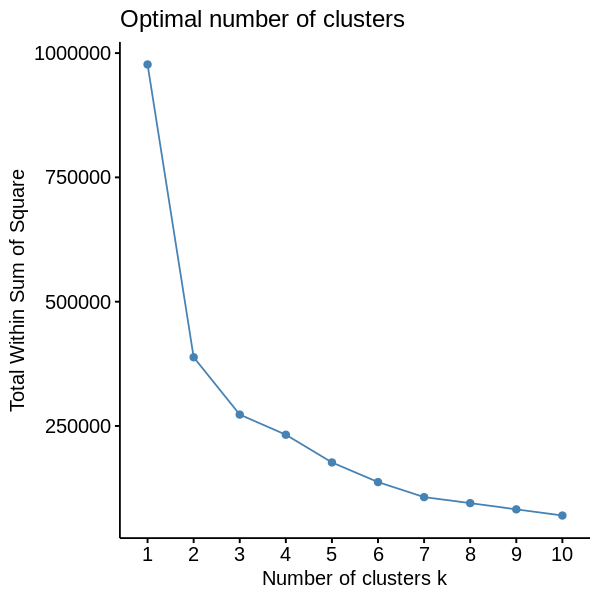

In [ ]:
## Elbow Method

set.seed(456)
fviz_nbclust(df, kmeans, method = "wss")